In [1]:
import pandas as pd
from sklearn import *
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df_train = pd.read_csv("/data/MNIST/mnist_train.csv", header = None)
df_test = pd.read_csv("/data/MNIST/mnist_test.csv", header = None)

In [3]:
df_train.shape, df_test.shape

((60000, 785), (10000, 785))

In [4]:
28 * 28

784

In [23]:
X_train = df_train.iloc[:,1:].values/255
X_test = df_test.iloc[:,1:].values/255

y_train = df_train.iloc[:,0]
y_test = df_test.iloc[:,0]

In [24]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [25]:
X_train[0].shape

(784,)

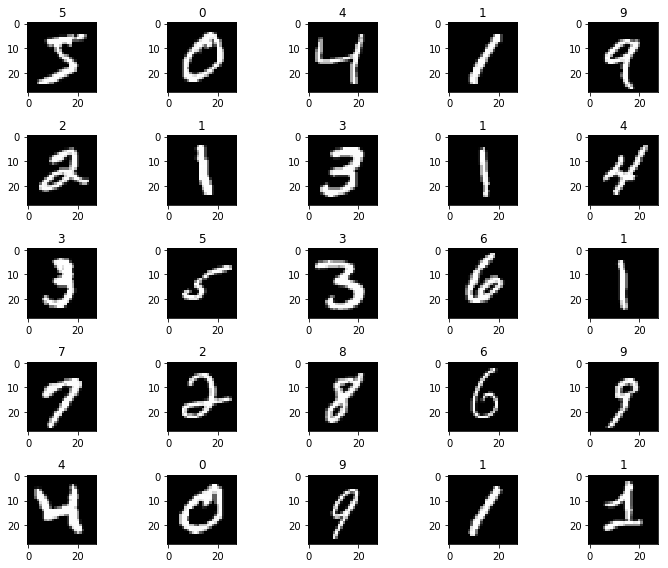

In [26]:
fig, _ = plt.subplots(5, 5, figsize = (10, 8))

for i, ax in enumerate(fig.axes):
    ax.imshow(X_train[i].reshape((28, 28)), cmap = "gray")
    ax.set_title(y_train[i])
    
plt.tight_layout()

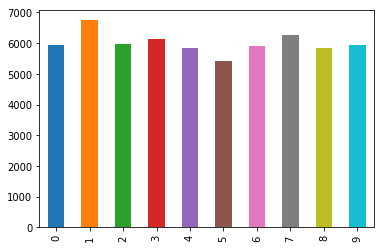

In [27]:
pd.Series(y_train).value_counts().sort_index().plot.bar()

(array([38847859.,   571880.,   514157.,   438029.,   446644.,   518761.,
          454060.,   518723.,   611860.,  4118027.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

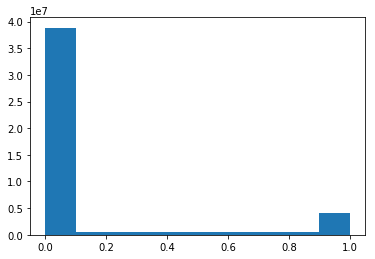

In [28]:
plt.hist(X_train.flatten())

In [20]:
a = X_train.flatten()
len(a[a==0])/np.product(X_train.shape)

0.8087977040816327

In [22]:
np.min(a), np.max(a)

(0, 255)

In [29]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [31]:
%%time

est = linear_model.SGDClassifier(loss = "log"
        , alpha = 0.1, max_iter = 100, tol = 1e-4, learning_rate="invscaling", eta0=0.15)

est.fit(X_train, y_train)

CPU times: user 22.8 s, sys: 125 ms, total: 22.9 s
Wall time: 22.9 s


In [32]:
y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

print("Test accuracy: %f" % metrics.accuracy_score(y_test, y_test_pred) )

Test accuracy: 0.857600


In [34]:
est.coef_.shape

(10, 784)

In [49]:
Y_train = keras.utils.to_categorical(y_train)
Y_test = keras.utils.to_categorical(y_test)
Y_train.shape, Y_test.shape 

((60000, 10), (10000, 10))

In [50]:
Y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [53]:
import keras
from time import time

In [58]:
model = keras.Sequential()

tboard = keras.callbacks.TensorBoard("/tmp/logs/%f" % time())

model.add(keras.layers.InputLayer(input_shape = (784,)))
model.add(keras.layers.Dense(400, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

model.compile(optimizer = keras.optimizers.SGD()
              , metrics = ["accuracy"]
              , loss = keras.losses.categorical_crossentropy
              
             )

model.summary()

model.fit(X_train, Y_train, epochs = 10
          , validation_data = (X_test, Y_test)
          , batch_size = 128, verbose = 1, callbacks = [tboard])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 400)               314000    
_________________________________________________________________
dense_11 (Dense)             (None, 100)               40100     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1010      
Total params: 355,110
Trainable params: 355,110
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 44us/step - loss: 1.1107 - acc: 0.7361 - val_loss: 0.5313 - val_acc: 0.8711
Epoch 2/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.4558 - acc: 0.8804 - val_loss: 0.3762 - val_acc: 0.8972
Epoch 3/10
60000/60000 [==============================] - 3s 42us/step - los

In [59]:
model = keras.Sequential()

tboard = keras.callbacks.TensorBoard("/tmp/logs/%f" % time())

model.add(keras.layers.InputLayer(input_shape = (784,)))
model.add(keras.layers.Dense(400, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

model.compile(optimizer = keras.optimizers.Adam()
              , metrics = ["accuracy"]
              , loss = keras.losses.categorical_crossentropy
              
             )

model.summary()

model.fit(X_train, Y_train, epochs = 10
          , validation_data = (X_test, Y_test)
          , batch_size = 128, verbose = 1, callbacks = [tboard])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 400)               314000    
_________________________________________________________________
dense_14 (Dense)             (None, 100)               40100     
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1010      
Total params: 355,110
Trainable params: 355,110
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.2518 - acc: 0.9279 - val_loss: 0.1118 - val_acc: 0.9652
Epoch 2/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.0961 - acc: 0.9710 - val_loss: 0.0840 - val_acc: 0.9740
Epoch 3/10
60000/60000 [==============================] - 3s 50us/step - los

In [62]:
X_train_2d = X_train.reshape((-1, 28, 28, 1))
X_test_2d = X_test.reshape((-1, 28, 28, 1))
X_train_2d.shape, X_test_2d.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
model = keras.Sequential()

tboard = keras.callbacks.TensorBoard("/tmp/logs/%f" % time())

model.add(keras.layers.InputLayer(input_shape = (28,28,1)))
model.add(keras.layers.Conv2D(32, (5, 5), padding = "SAME", activation = "relu"))
model.add(keras.layers.MaxPooling2D((2, 2), padding = "SAME"))

model.add(keras.layers.Conv2D(64, (5, 5), padding = "SAME", activation = "relu"))
model.add(keras.layers.MaxPooling2D((2, 2), padding = "SAME"))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(400, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

model.compile(optimizer = keras.optimizers.Adam()
              , metrics = ["accuracy"]
              , loss = keras.losses.categorical_crossentropy
              
             )

model.summary()

model.fit(X_train_2d, Y_train, epochs = 10
          , validation_data = (X_test_2d, Y_test)
          , batch_size = 128, verbose = 1, callbacks = [tboard])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 400)               1254800   
_________________________________________________________________
dense_17 (Dense)             (None, 100)               40100     
__________